In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle


In [7]:
df = pd.read_csv('../Data/matches.csv')
df = df.dropna()

In [14]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
636,7894,2018,Mumbai,07/04/18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
637,7895,2018,Mohali,08/04/18,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
638,7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
639,7897,2018,Hyderabad,09/04/18,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
640,7898,2018,Chennai,10/04/18,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore


In [16]:
df.shape

(118, 18)

In [17]:
df['player_of_match'].value_counts

<bound method IndexOpsMixin.value_counts of 636        DJ Bravo
637        KL Rahul
638       SP Narine
639        S Dhawan
640     SW Billings
           ...     
750        KL Rahul
751       HH Pandya
752        AS Yadav
754    F du Plessis
755       JJ Bumrah
Name: player_of_match, Length: 118, dtype: object>

In [18]:
df['player_of_match'].value_counts()[0:10]

player_of_match
Rashid Khan       5
AB de Villiers    5
SR Watson         5
AD Russell        5
S Dhawan          4
JC Buttler        4
MS Dhoni          4
HH Pandya         4
KL Rahul          4
JJ Bumrah         4
Name: count, dtype: int64

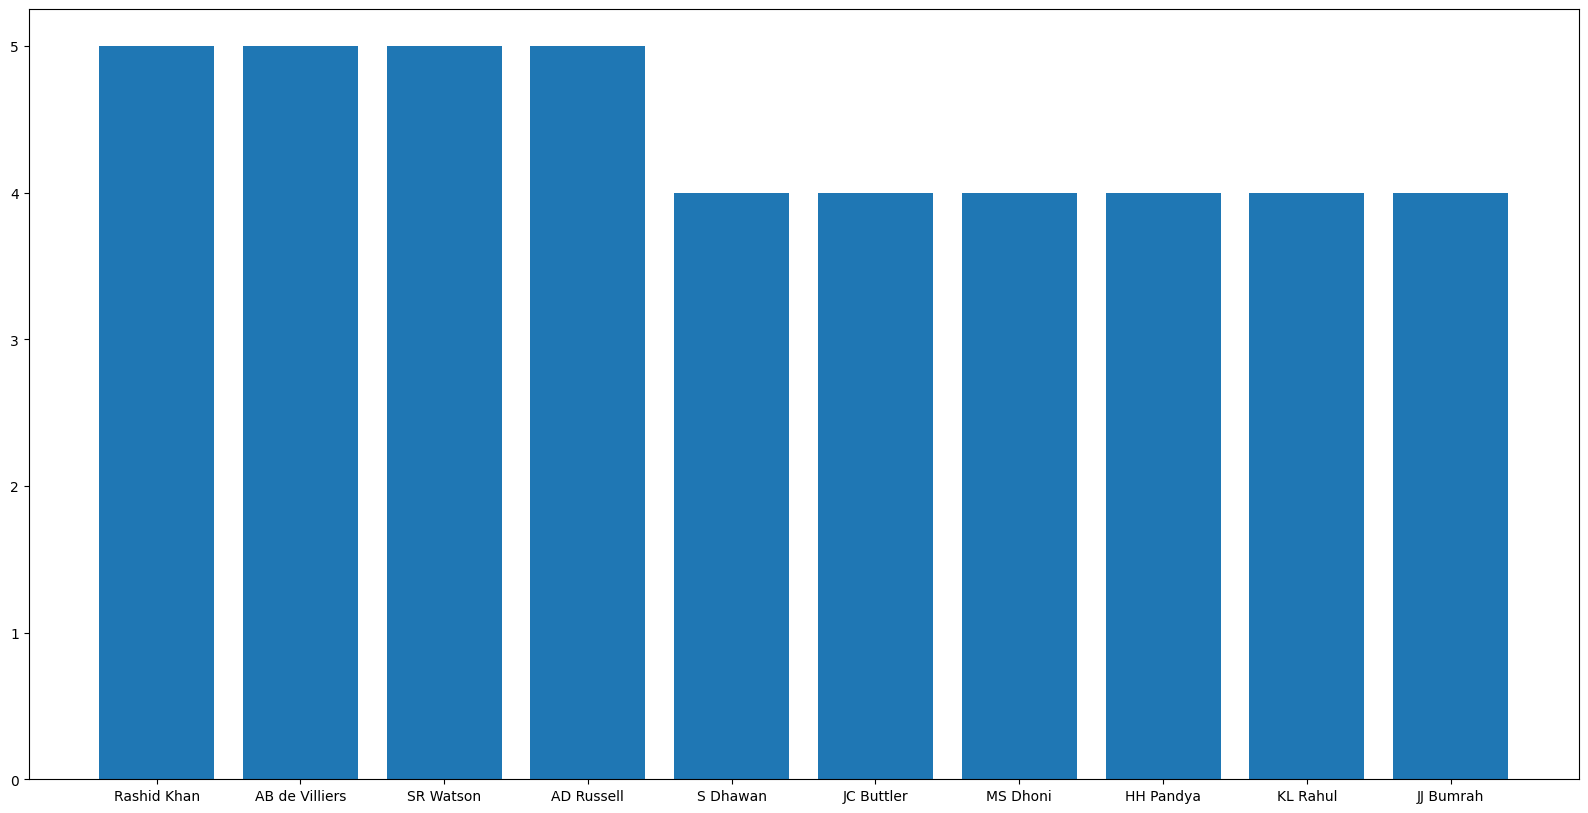

In [25]:
plt.figure(figsize=(20,10))
plt.bar(list(df['player_of_match'].value_counts()[0:10].keys()),list(df['player_of_match'].value_counts()[0:10]))
plt.show()

In [26]:
df['result'].value_counts()

result
normal    116
tie         2
Name: count, dtype: int64

In [27]:
df['toss_winner'].value_counts()

toss_winner
Chennai Super Kings            23
Rajasthan Royals               16
Kolkata Knight Riders          14
Mumbai Indians                 13
Kings XI Punjab                13
Royal Challengers Bangalore    11
Sunrisers Hyderabad            11
Delhi Capitals                  9
Delhi Daredevils                8
Name: count, dtype: int64

In [28]:
batting_first = df[df['win_by_runs']!=0]

In [29]:
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
641,7899,2018,Jaipur,11/04/18,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,1,Rajasthan Royals,10,0,SV Samson,Sawai Mansingh Stadium,K Ananthapadmanabhan,Rod Tucker,Nitin Menon
646,7904,2018,Bengaluru,15/04/18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rajasthan Royals,19,0,SV Samson,M Chinnaswamy Stadium,C Shamshuddin,S Ravi,A.D Deshmukh
647,7905,2018,Mohali,15/04/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Kings XI Punjab,4,0,CH Gayle,"Punjab Cricket Association IS Bindra Stadium, ...",Vineet Kulkarni,O Nandan,Nigel Llong
648,7906,2018,Kolkata,16/04/18,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,normal,0,Kolkata Knight Riders,71,0,N Rana,Eden Gardens,Anil Chaudhary,A Nanda Kishore,Chris Gaffaney
649,7907,2018,Mumbai,17/04/18,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,46,0,RG Sharma,Wankhede Stadium,Rod Tucker,Nitin Menon,K Ananthapadmanabhan


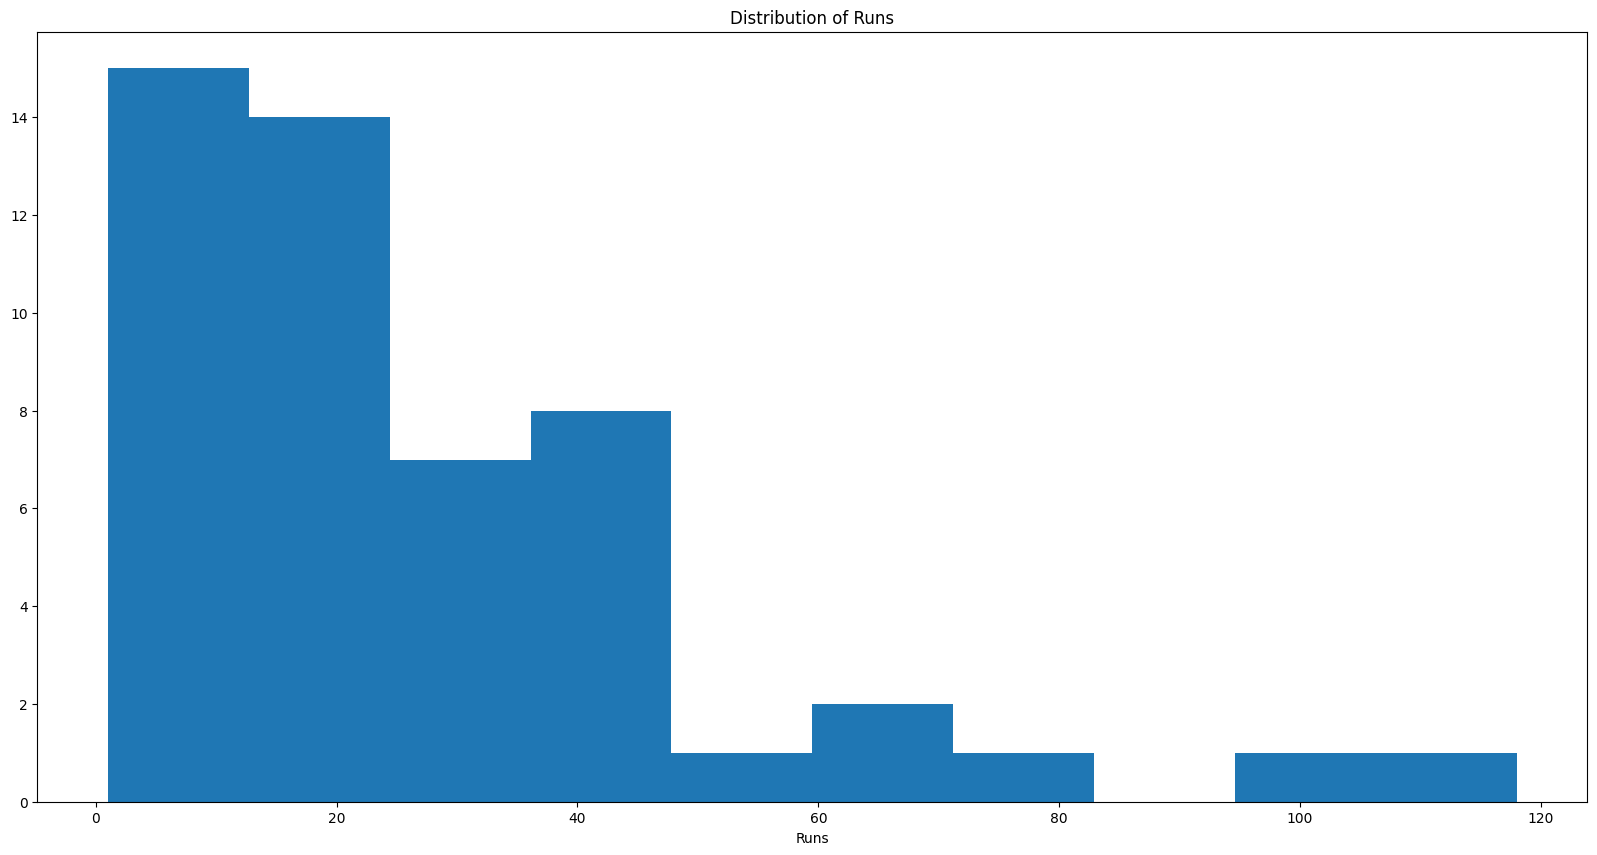

In [30]:
plt.figure(figsize=(20,10))
plt.hist(batting_first['win_by_runs'])
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.show()

In [31]:
X = df[['toss_winner', 'team1', 'team2', 'venue']]
X = pd.get_dummies(X)
y = df['winner']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
with open('../model/prediction_model.pkl', 'wb') as file:
  pickle.dump(model, file)